<a href="https://colab.research.google.com/github/JoyKaihatu/DeepLearningFinals/blob/main/DATASET_WHITE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import visualkeras
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import time

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/UAS_DL/Dataset_White'
path2 = '/content/drive/MyDrive/UAS_DL/Model_White'

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(path+'/train',
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode='categorical')
validation_dataset = validation.flow_from_directory(path+'/val',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical')

Found 1461 images belonging to 30 classes.
Found 172 images belonging to 30 classes.


In [ ]:
test = ImageDataGenerator(rescale=1/255)

test_dataset = test.flow_from_directory(path+'/test',
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode='categorical')

Found 210 images belonging to 30 classes.


In [ ]:
train_dataset.class_indices


{'Alpinia Galanga': 0,
 'Amaranthus Viridis': 1,
 'Artocarpus Heterophyllus': 2,
 'Azadirachta Indica': 3,
 'Basella Alba': 4,
 'Brassica Juncea': 5,
 'Carissa Carandas': 6,
 'Citrus Limon': 7,
 'Ficus Auriculata': 8,
 'Ficus Religiosa': 9,
 'Hibiscus Rosa': 10,
 'Jasminum': 11,
 'Mangifera Indica': 12,
 'Mentha Piperita': 13,
 'Moringa Oleifera': 14,
 'Muntingia Calabura': 15,
 'Murraya Koenigii': 16,
 'Nerium Oleander': 17,
 'Nyctanthes Arbor Tristis': 18,
 'Ocimum Tenuiflorum': 19,
 'Piper Betle': 20,
 'Plectranthus Amboinicus': 21,
 'Pongamia Pinnata': 22,
 'Psidium Guajava': 23,
 'Punica Granatum': 24,
 'Santalum Album': 25,
 'Syzygium Cumini': 26,
 'Syzygium Jambos': 27,
 'Tabernaemontana Divaricata': 28,
 'Trigonella Foenum Graecum': 29}

In [ ]:
validation_dataset.class_indices

{'Alpinia Galanga': 0,
 'Amaranthus Viridis': 1,
 'Artocarpus Heterophyllus': 2,
 'Azadirachta Indica': 3,
 'Basella Alba': 4,
 'Brassica Juncea': 5,
 'Carissa Carandas': 6,
 'Citrus Limon': 7,
 'Ficus Auriculata': 8,
 'Ficus Religiosa': 9,
 'Hibiscus Rosa': 10,
 'Jasminum': 11,
 'Mangifera Indica': 12,
 'Mentha Piperita': 13,
 'Moringa Oleifera': 14,
 'Muntingia Calabura': 15,
 'Murraya Koenigii': 16,
 'Nerium Oleander': 17,
 'Nyctanthes Arbor Tristis': 18,
 'Ocimum Tenuiflorum': 19,
 'Piper Betle': 20,
 'Plectranthus Amboinicus': 21,
 'Pongamia Pinnata': 22,
 'Psidium Guajava': 23,
 'Punica Granatum': 24,
 'Santalum Album': 25,
 'Syzygium Cumini': 26,
 'Syzygium Jambos': 27,
 'Tabernaemontana Divaricata': 28,
 'Trigonella Foenum Graecum': 29}

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']


    accuracy = history.history['accuracy']


    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")

    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")

    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
class DurationCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = tf.timestamp()

    def on_epoch_end(self, epoch, logs=None):
        end_time = tf.timestamp()
        duration = end_time - self.start_time
        logs['duration'] = duration.numpy()
duration_callback = DurationCallback()

In [ ]:
def find_the_value(arr):
    a =  train_dataset.class_indices

    arr = arr.flatten()
    maxs_index = np.argmax(arr)



    for x,y in a.items():
        if y == maxs_index:
            return x

# Model Deep Learn

## VGG16

In [ ]:

model_VGG16=tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_VGG16.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))
x = model_VGG16(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG16 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG16")

model_VGG16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 30)                15390  

## Resnet50V2

In [ ]:

model_RESNET50V2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)
model_RESNET50V2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_RESNET50V2(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Use global pooling to handle any size
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_RESNET50V2 = tf.keras.models.Model(inputs = input, outputs = x, name = "ResNet50V2")

model_RESNET50V2.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "ResNet50V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                         

## DenseNet201

In [ ]:

model_DenseNet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_DenseNet201.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_DenseNet201(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_DenseNet201 = tf.keras.models.Model(inputs = input, outputs = x, name = "DenseNet201")

model_DenseNet201.summary()

74836368/74836368 [==============================] - 1s 0us/step
Model: "DenseNet201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, None, None, 1920   18321984  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               983552    
                                                        

## VGG19

In [ ]:


model_VGG19 = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_VGG19.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_VGG19(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_VGG19 = tf.keras.models.Model(inputs = input, outputs = x, name = "VGG19")

model_VGG19.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 30)                15390  

## Inception V3

In [ ]:

model_InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionV3.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionV3(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionV3 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionV3")

model_InceptionV3.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                        

## Xception

In [ ]:

model_Xception = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_Xception.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_Xception(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_Xception = tf.keras.models.Model(inputs = input, outputs = x, name = "Xception")

model_Xception.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                           

## InceptionResNetV2

In [ ]:

model_InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_InceptionResNetV2.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_InceptionResNetV2(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_InceptionResNetV2 = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_InceptionResNetV2.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling2d_6  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_6 (Flatten)         (None, 1536)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               786944    
                                                

## MobileNetV3 Large

In [ ]:

model_MobileNetV3Large = tf.keras.applications.MobileNetV3Large(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

model_MobileNetV3Large.trainable = True
input = tf.keras.layers.Input(shape=(224, 224, 3))

x = model_MobileNetV3Large(input, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(30, activation = 'softmax')(x)
model_MobileNetV3Large = tf.keras.models.Model(inputs = input, outputs = x, name = "InceptionResNetV2")

model_MobileNetV3Large.summary()

12683000/12683000 [==============================] - 0s 0us/step
Model: "InceptionResNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Function  (None, None, None, 960)   2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_7  (None, 960)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_7 (Flatten)         (None, 960)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               492032    
                                                  

# Compile Model

In [ ]:
optimizer = 'adam'
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
model_VGG16.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_RESNET50V2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_DenseNet201.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_VGG19.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionV3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_Xception.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_InceptionResNetV2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_MobileNetV3Large.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
print('Hello World')

Hello World


# Fit Model

In [ ]:
EPOCH = 100
BATCH_SIZE = 32

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

CALLBACK = [duration_callback, callback2]

## VGG16

Epoch 1/100
46/46 [==============================] - 704s 15s/step - loss: 3.4641 - accuracy: 0.0472 - val_loss: 3.3609 - val_accuracy: 0.0581 - duration: 703.5495
Epoch 2/100
46/46 [==============================] - 28s 603ms/step - loss: 3.3828 - accuracy: 0.0561 - val_loss: 3.3467 - val_accuracy: 0.0581 - duration: 27.8566
Epoch 3/100
46/46 [==============================] - 26s 552ms/step - loss: 3.3777 - accuracy: 0.0637 - val_loss: 3.3605 - val_accuracy: 0.0698 - duration: 25.6656
Epoch 4/100
46/46 [==============================] - 28s 596ms/step - loss: 3.3736 - accuracy: 0.0671 - val_loss: 3.3538 - val_accuracy: 0.0698 - duration: 27.5711
Epoch 5/100
46/46 [==============================] - 26s 550ms/step - loss: 3.3678 - accuracy: 0.0664 - val_loss: 3.3527 - val_accuracy: 0.0698 - duration: 25.5938
Epoch 6/100
46/46 [==============================] - 26s 565ms/step - loss: 3.3710 - accuracy: 0.0637 - val_loss: 3.3558 - val_accuracy: 0.0698 - duration: 26.1657
Epoch 7/100
46/4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


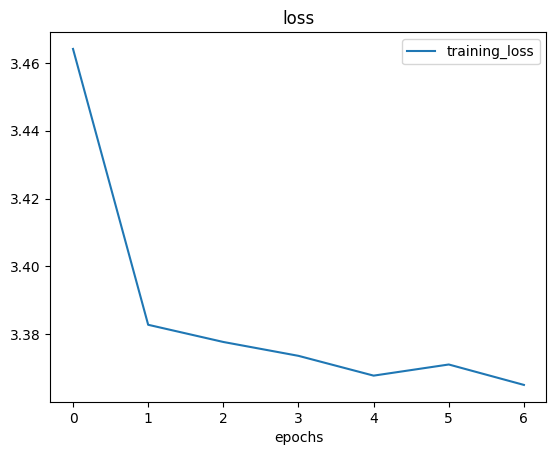

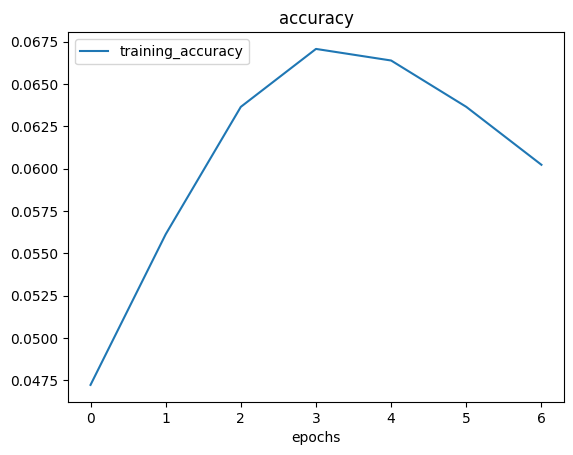

In [ ]:
model_VGG16_Histo = model_VGG16.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_VGG16.save(path2+'/model_VGG16.keras')
plot_loss_curves(model_VGG16_Histo)

Epoch 1/100
46/46 [==============================] - 67s 733ms/step - loss: 4.0414 - accuracy: 0.0465 - val_loss: 3.3722 - val_accuracy: 0.0698 - duration: 67.3994
Epoch 2/100
46/46 [==============================] - 27s 581ms/step - loss: 3.3953 - accuracy: 0.0541 - val_loss: 3.3524 - val_accuracy: 0.0698 - duration: 26.8991
Epoch 3/100
46/46 [==============================] - 25s 544ms/step - loss: 3.3709 - accuracy: 0.0623 - val_loss: 3.3521 - val_accuracy: 0.0698 - duration: 25.1824
Epoch 4/100
46/46 [==============================] - 24s 512ms/step - loss: 3.3735 - accuracy: 0.0664 - val_loss: 3.3532 - val_accuracy: 0.0698 - duration: 23.7938
Epoch 5/100
46/46 [==============================] - 28s 616ms/step - loss: 3.3668 - accuracy: 0.0726 - val_loss: 3.3509 - val_accuracy: 0.0698 - duration: 28.4590
Epoch 6/100
46/46 [==============================] - 29s 621ms/step - loss: 3.3657 - accuracy: 0.0664 - val_loss: 3.3496 - val_accuracy: 0.0698 - duration: 28.6978
Epoch 7/100
46/4

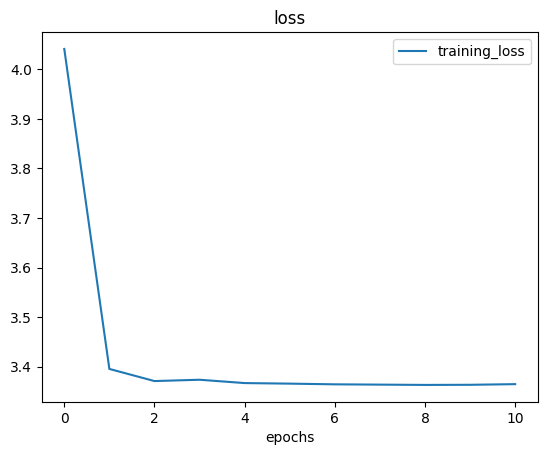

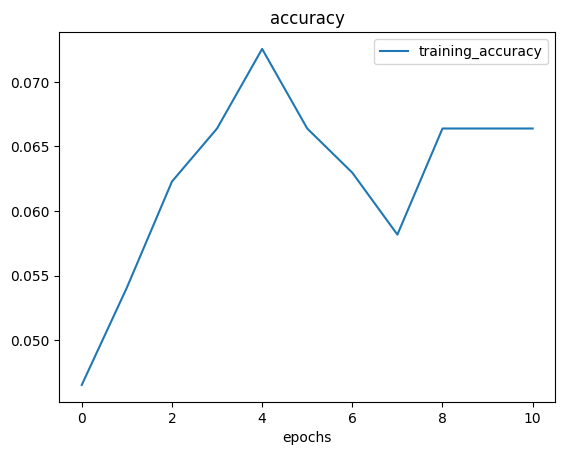

In [ ]:
model_Resnet50V2_Histo = model_RESNET50V2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_RESNET50V2.save(path2+'/model_RESNET50V2.keras')
plot_loss_curves(model_Resnet50V2_Histo)

Epoch 1/100
46/46 [==============================] - 177s 1s/step - loss: 3.9587 - accuracy: 0.0513 - val_loss: 3.3827 - val_accuracy: 0.0581 - duration: 177.4553
Epoch 2/100
46/46 [==============================] - 30s 637ms/step - loss: 3.3807 - accuracy: 0.0575 - val_loss: 3.3604 - val_accuracy: 0.0698 - duration: 29.6860
Epoch 3/100
46/46 [==============================] - 30s 639ms/step - loss: 3.3717 - accuracy: 0.0671 - val_loss: 3.3649 - val_accuracy: 0.0581 - duration: 29.6899
Epoch 4/100
46/46 [==============================] - 30s 640ms/step - loss: 3.3721 - accuracy: 0.0643 - val_loss: 3.3576 - val_accuracy: 0.0581 - duration: 29.7051
Epoch 5/100
46/46 [==============================] - 31s 657ms/step - loss: 3.3662 - accuracy: 0.0637 - val_loss: 3.3563 - val_accuracy: 0.0698 - duration: 30.5276
Epoch 6/100
46/46 [==============================] - 31s 673ms/step - loss: 3.3667 - accuracy: 0.0664 - val_loss: 3.3576 - val_accuracy: 0.0698 - duration: 31.2381
Epoch 7/100
46/46

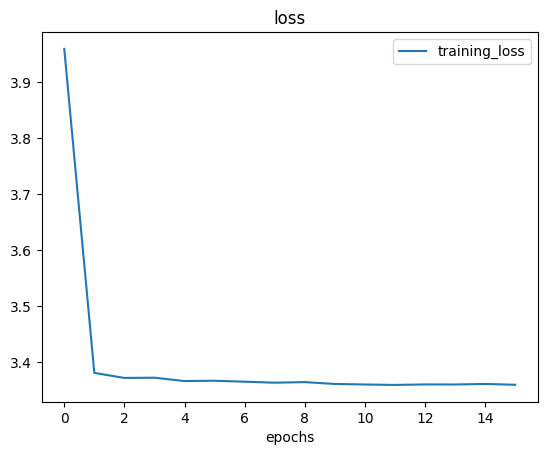

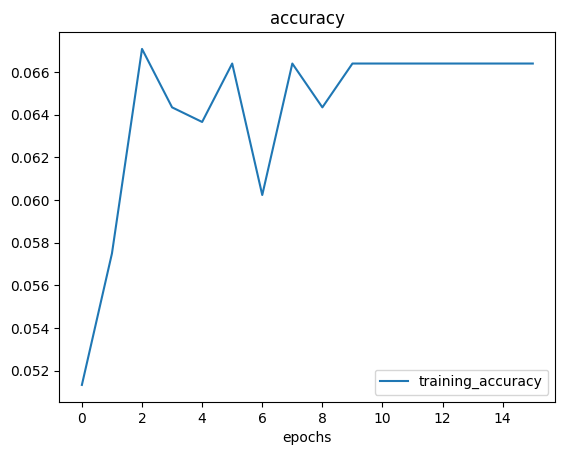

In [ ]:
model_DenseNet201_Histo = model_DenseNet201.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_DenseNet201.save(path2+'/model_DenseNet201.keras')
plot_loss_curves(model_DenseNet201_Histo)

Epoch 1/100
 6/46 [==>...........................] - ETA: 19s - loss: 19.5804 - accuracy: 0.0208

46/46 [==============================] - 34s 583ms/step - loss: 5.5349 - accuracy: 0.0513 - val_loss: 3.3695 - val_accuracy: 0.0698 - duration: 33.7515
Epoch 2/100
46/46 [==============================] - 27s 592ms/step - loss: 3.3839 - accuracy: 0.0650 - val_loss: 3.3534 - val_accuracy: 0.0698 - duration: 27.4607
Epoch 3/100
46/46 [==============================] - 28s 599ms/step - loss: 3.3667 - accuracy: 0.0595 - val_loss: 3.3572 - val_accuracy: 0.0581 - duration: 27.7710
Epoch 4/100
46/46 [==============================] - 27s 578ms/step - loss: 3.3806 - accuracy: 0.0630 - val_loss: 3.3598 - val_accuracy: 0.0698 - duration: 26.8363
Epoch 5/100
46/46 [==============================] - 29s 612ms/step - loss: 3.3695 - accuracy: 0.0657 - val_loss: 3.3569 - val_accuracy: 0.0698 - duration: 28.5321
Epoch 6/100
46/46 [==============================] - 27s 586ms/step - loss: 3.3742 - accuracy: 0.0643 - val_loss: 3.4313 - val_accuracy: 0.0523 - duration: 27.2399
Epoch 7/100
46/46 [=========

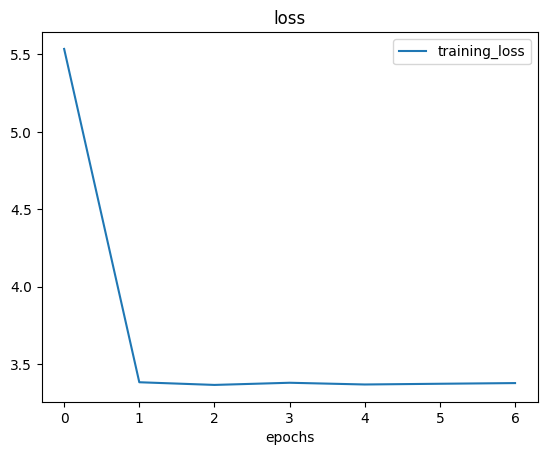

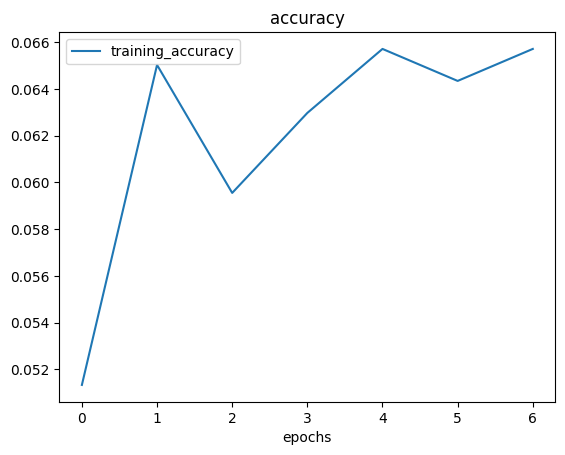

In [ ]:
model_VGG19_Histo = model_VGG19.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_VGG19.save(path2+'/model_VGG19.keras')
plot_loss_curves(model_VGG19_Histo)

Epoch 1/100
46/46 [==============================] - 73s 740ms/step - loss: 3.8853 - accuracy: 0.0424 - val_loss: 3.3779 - val_accuracy: 0.0698 - duration: 72.8275
Epoch 2/100
46/46 [==============================] - 24s 524ms/step - loss: 3.3813 - accuracy: 0.0664 - val_loss: 3.3550 - val_accuracy: 0.0698 - duration: 24.3377
Epoch 3/100
46/46 [==============================] - 25s 551ms/step - loss: 3.3720 - accuracy: 0.0643 - val_loss: 3.3556 - val_accuracy: 0.0698 - duration: 25.4937
Epoch 4/100
46/46 [==============================] - 26s 563ms/step - loss: 3.3680 - accuracy: 0.0664 - val_loss: 3.3521 - val_accuracy: 0.0698 - duration: 26.1032
Epoch 5/100
46/46 [==============================] - 25s 545ms/step - loss: 3.3887 - accuracy: 0.0650 - val_loss: 3.3793 - val_accuracy: 0.0523 - duration: 25.2102
Epoch 6/100
46/46 [==============================] - 25s 545ms/step - loss: 3.5605 - accuracy: 0.0424 - val_loss: 3.3906 - val_accuracy: 0.0349 - duration: 25.2175
Epoch 7/100
46/4

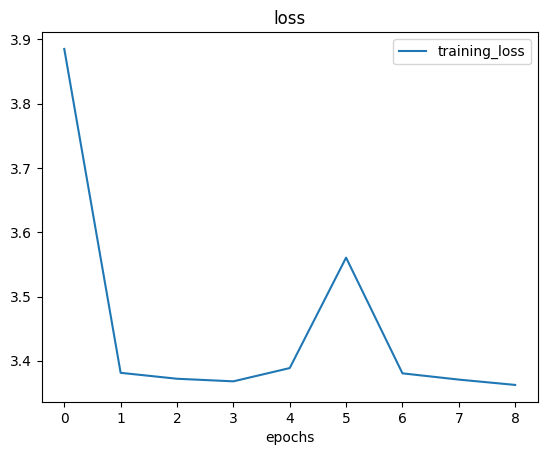

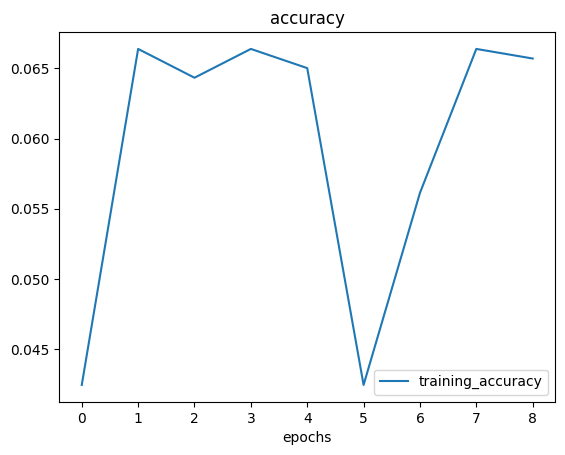

In [ ]:
model_InceptionV3_Histo = model_InceptionV3.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_InceptionV3.save(path2+'/model_InceptionV3.keras')
plot_loss_curves(model_InceptionV3_Histo)

Epoch 1/100
46/46 [==============================] - 67s 746ms/step - loss: 3.3890 - accuracy: 0.0643 - val_loss: 3.3855 - val_accuracy: 0.0698 - duration: 66.8596
Epoch 2/100
46/46 [==============================] - 30s 643ms/step - loss: 3.3808 - accuracy: 0.0664 - val_loss: 3.3701 - val_accuracy: 0.0698 - duration: 29.7558
Epoch 3/100
46/46 [==============================] - 27s 582ms/step - loss: 3.3685 - accuracy: 0.0664 - val_loss: 3.3568 - val_accuracy: 0.0698 - duration: 27.0438
Epoch 4/100
46/46 [==============================] - 27s 586ms/step - loss: 3.3610 - accuracy: 0.0664 - val_loss: 3.3522 - val_accuracy: 0.0698 - duration: 27.2007
Epoch 5/100
46/46 [==============================] - 27s 585ms/step - loss: 3.3589 - accuracy: 0.0664 - val_loss: 3.3499 - val_accuracy: 0.0698 - duration: 27.2470
Epoch 6/100
46/46 [==============================] - 27s 585ms/step - loss: 3.3583 - accuracy: 0.0664 - val_loss: 3.3501 - val_accuracy: 0.0698 - duration: 27.1604
Epoch 7/100
46/4

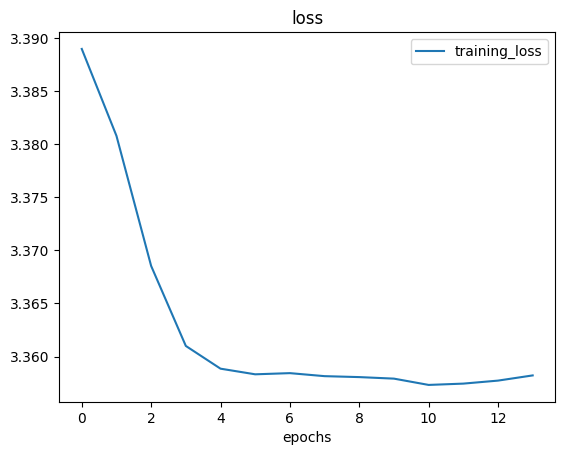

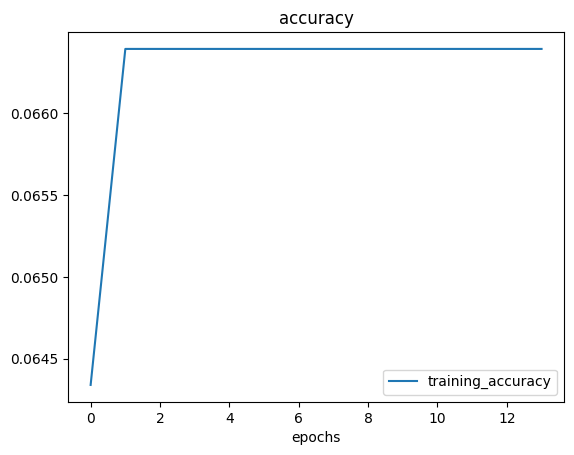

In [ ]:
model_Xception_Histo = model_Xception.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_Xception.save(path2+'/model_Xception.keras')
plot_loss_curves(model_Xception_Histo)

Epoch 1/100
46/46 [==============================] - 126s 814ms/step - loss: 3.8097 - accuracy: 0.0472 - val_loss: 3.3961 - val_accuracy: 0.0698 - duration: 125.7706
Epoch 2/100
46/46 [==============================] - 28s 603ms/step - loss: 3.4083 - accuracy: 0.0513 - val_loss: 3.3577 - val_accuracy: 0.0698 - duration: 28.1194
Epoch 3/100
46/46 [==============================] - 30s 652ms/step - loss: 3.3752 - accuracy: 0.0609 - val_loss: 3.3569 - val_accuracy: 0.0523 - duration: 30.3126
Epoch 4/100
46/46 [==============================] - 28s 614ms/step - loss: 3.3728 - accuracy: 0.0657 - val_loss: 3.3505 - val_accuracy: 0.0698 - duration: 28.4754
Epoch 5/100
46/46 [==============================] - 29s 615ms/step - loss: 3.3677 - accuracy: 0.0630 - val_loss: 3.3612 - val_accuracy: 0.0698 - duration: 28.5349
Epoch 6/100
46/46 [==============================] - 29s 624ms/step - loss: 3.3665 - accuracy: 0.0650 - val_loss: 3.3637 - val_accuracy: 0.0698 - duration: 29.0014
Epoch 7/100
46

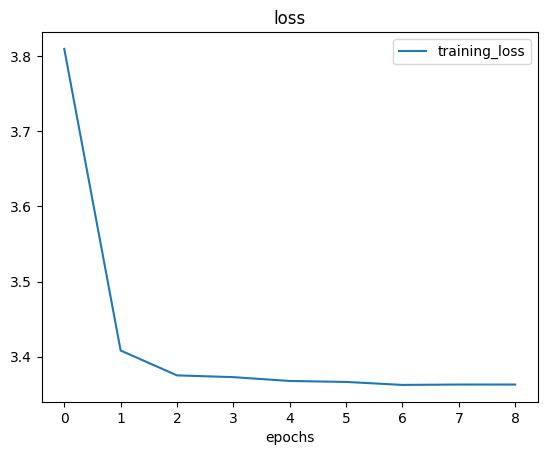

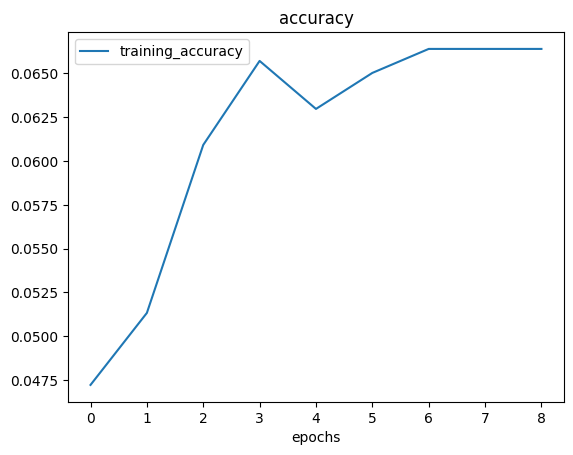

In [ ]:
model_InceptionResNetV2_Histo = model_InceptionResNetV2.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_InceptionResNetV2.save(path2+'/model_InceptionResNetV2.keras')
plot_loss_curves(model_InceptionResNetV2_Histo)

Epoch 1/100
46/46 [==============================] - 61s 574ms/step - loss: 137.3854 - accuracy: 0.0493 - val_loss: 3.3642 - val_accuracy: 0.0523 - duration: 60.9692
Epoch 2/100
46/46 [==============================] - 25s 536ms/step - loss: 3.3854 - accuracy: 0.0507 - val_loss: 3.3852 - val_accuracy: 0.0407 - duration: 24.6214
Epoch 3/100
46/46 [==============================] - 22s 485ms/step - loss: 3.4595 - accuracy: 0.0575 - val_loss: 3.4442 - val_accuracy: 0.0698 - duration: 22.4472
Epoch 4/100
46/46 [==============================] - 23s 505ms/step - loss: 3.3887 - accuracy: 0.0500 - val_loss: 3.3630 - val_accuracy: 0.0698 - duration: 23.2824
Epoch 5/100
46/46 [==============================] - 22s 482ms/step - loss: 3.3724 - accuracy: 0.0616 - val_loss: 3.3697 - val_accuracy: 0.0698 - duration: 22.2495
Epoch 6/100
46/46 [==============================] - 24s 520ms/step - loss: 3.3702 - accuracy: 0.0630 - val_loss: 3.3537 - val_accuracy: 0.0698 - duration: 23.9742
Epoch 7/100
46

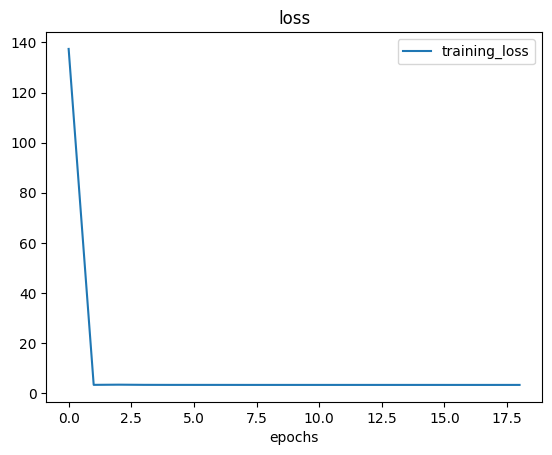

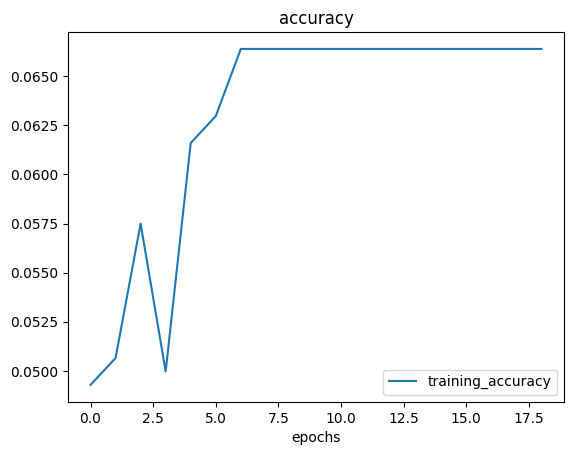

In [ ]:
model_MobileNetV3Large_Histo = model_MobileNetV3Large.fit(train_dataset, epochs=EPOCH, validation_data = validation_dataset, batch_size=BATCH_SIZE, callbacks=CALLBACK)
model_MobileNetV3Large.save(path2+'/model_MobileNetV3Large.keras')
plot_loss_curves(model_MobileNetV3Large_Histo)

# Evaluate to Get Acc and Loss


In [ ]:
val_loss1, val_acc1 = model_VGG16.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc1*100))
print(f'Val_Loss: {val_loss1}')

print(" ")

test_loss1, test_acc1 = model_VGG16.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc1*100))
print(f'Test_Loss: {test_loss1}')

6/6 - 3s - loss: 3.3508 - accuracy: 0.0698 - 3s/epoch - 431ms/step
Val_Accuracy: 6.98
Val_Loss: 3.3507604598999023
 
7/7 - 87s - loss: 3.3662 - accuracy: 0.0619 - 87s/epoch - 12s/step
Test_Accuracy: 6.19
Test_Loss: 3.366213321685791


In [ ]:
val_loss2, val_acc2 = model_RESNET50V2.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc2*100))
print(f'Val_Loss: {val_loss2}')

print(" ")

test_loss2, test_acc2 = model_RESNET50V2.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc2*100))
print(f'Test_Loss: {test_loss2}')

6/6 - 3s - loss: 3.3532 - accuracy: 0.0698 - 3s/epoch - 479ms/step
Val_Accuracy: 6.98
Val_Loss: 3.3531718254089355
 
7/7 - 5s - loss: 3.3641 - accuracy: 0.0619 - 5s/epoch - 755ms/step
Test_Accuracy: 6.19
Test_Loss: 3.364109516143799


In [ ]:
val_loss3 , val_acc3 = model_DenseNet201.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc3*100))
print(f'Val_Loss: {val_loss3}')

print(" ")

test_loss3, test_acc3 = model_DenseNet201.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc3*100))
print(f'Test_Loss: {test_loss3}')

6/6 - 5s - loss: 3.3498 - accuracy: 0.0698 - 5s/epoch - 861ms/step
Val_Accuracy: 6.98
Val_Loss: 3.3497512340545654
 
7/7 - 10s - loss: 3.3635 - accuracy: 0.0619 - 10s/epoch - 1s/step
Test_Accuracy: 6.19
Test_Loss: 3.3635106086730957


In [ ]:
val_loss4, val_acc4 = model_VGG19.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc4*100))
print(f'Val_Loss: {val_loss4}')

print(" ")

test_loss4, test_acc4 = model_VGG19.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc4*100))
print(f'Test_Loss: {test_loss4}')

6/6 - 3s - loss: 3.3611 - accuracy: 0.0698 - 3s/epoch - 531ms/step
Val_Accuracy: 6.98
Val_Loss: 3.3610634803771973
 
7/7 - 4s - loss: 3.3693 - accuracy: 0.0619 - 4s/epoch - 626ms/step
Test_Accuracy: 6.19
Test_Loss: 3.3693089485168457


In [ ]:
val_loss5, val_acc5 = model_InceptionV3.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc5*100))
print(f'Val_Loss: {val_loss5}')

print(" ")

test_loss5, test_acc5 = model_InceptionV3.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc5*100))
print(f'Test_Loss: {test_loss5}')

6/6 - 3s - loss: 3.3526 - accuracy: 0.0698 - 3s/epoch - 567ms/step
Val_Accuracy: 6.98
Val_Loss: 3.3525805473327637
 
7/7 - 8s - loss: 3.3635 - accuracy: 0.0619 - 8s/epoch - 1s/step
Test_Accuracy: 6.19
Test_Loss: 3.363475799560547


In [ ]:
val_loss6,  val_acc6 = model_Xception.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc6*100))
print(f'Val_Loss: {val_loss6}')

print(" ")

test_loss6, test_acc6 = model_Xception.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc6*100))
print(f'Test_Loss: {test_loss6}')

6/6 - 2s - loss: 3.3497 - accuracy: 0.0698 - 2s/epoch - 382ms/step
Val_Accuracy: 6.98
Val_Loss: 3.349689483642578
 
7/7 - 4s - loss: 3.3632 - accuracy: 0.0619 - 4s/epoch - 617ms/step
Test_Accuracy: 6.19
Test_Loss: 3.363163948059082


In [ ]:
val_loss7, val_acc7 = model_InceptionResNetV2.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc7*100))
print(f'Val_Loss: {val_loss7}')

print(" ")

test_loss7, test_acc7 = model_InceptionResNetV2.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc7*100))
print(f'Test_Loss: {test_loss7}')

6/6 - 2s - loss: 3.3548 - accuracy: 0.0698 - 2s/epoch - 413ms/step
Val_Accuracy: 6.98
Val_Loss: 3.354848861694336
 
7/7 - 6s - loss: 3.3643 - accuracy: 0.0619 - 6s/epoch - 859ms/step
Test_Accuracy: 6.19
Test_Loss: 3.3642778396606445


In [ ]:
val_loss8, val_acc8 = model_MobileNetV3Large.evaluate(validation_dataset, verbose=2)
print("Val_Accuracy: %.2f" % (val_acc8*100))
print(f'Val_Loss: {val_loss7}')

print(" ")

test_loss8, test_acc8 = model_MobileNetV3Large.evaluate(test_dataset, verbose=2)
print("Test_Accuracy: %.2f" % (test_acc8*100))
print(f'Test_Loss: {test_loss8}')

6/6 - 2s - loss: 3.3511 - accuracy: 0.0698 - 2s/epoch - 390ms/step
Val_Accuracy: 6.98
Val_Loss: 3.354848861694336
 
7/7 - 4s - loss: 3.3633 - accuracy: 0.0619 - 4s/epoch - 617ms/step
Test_Accuracy: 6.19
Test_Loss: 3.363274335861206
